<h1>Quiz 1 : Pemahaman ALgoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana Process algoritma KNN?
   menghitung jarak dirinya ke setiap point dengan jarak antara 2 data,
   kemudian memilih sebanyak k terdekat dan melakukan Voting, kemudian hasilnya
   mencari data terbanyak

2. Jelaskan minimal 2 kekurangan dari Algoritma KNN?

   sangat sensitif terhadap data pencilan,
   Rentan terhadap variabel yang non-informatif


<h1>Quiz 2 : Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparaeter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot ke dua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

Uniform Score : [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]
distance Score: [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


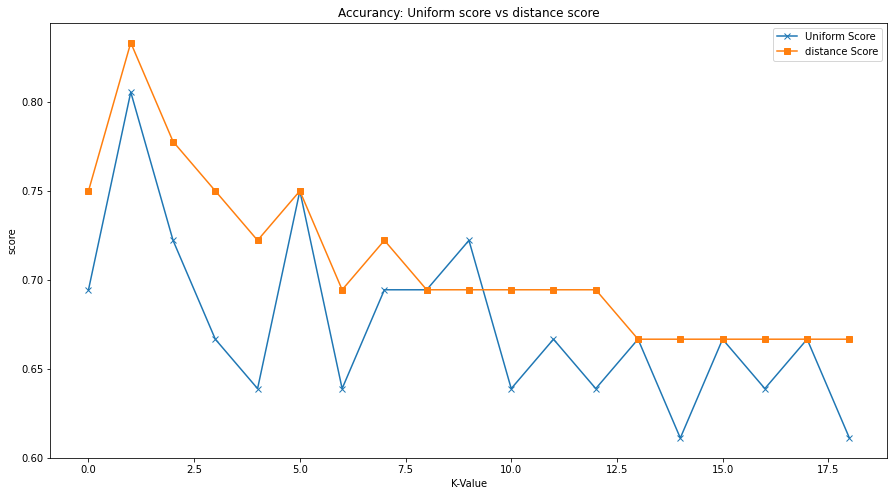

In [0]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

lsScore = {'uniform':[], 'distance':[]}
for i in ['uniform', 'distance']:
  for j in range(2,21):
    y_predic = KNeighborsClassifier(n_neighbors=j, weights=i).fit(X_train,y_train).predict(X_test)
    lsScore[i].append(accuracy_score(y_test, y_predic))

u = lsScore['uniform']
d = lsScore['distance']

print('Uniform Score :', u)
print('distance Score:', d)

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(u, marker="x", label='Uniform Score')
plt.plot(d, marker="s", label='distance Score')

ax.set_title("Accurancy: Uniform score vs distance score")
ax.set_xlabel("K-Value")
ax.set_ylabel("score")


plt.legend()
plt.show()


Contoh hasil yang di harapkan :

Uniform Scores -> [0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]
 
 distance scores -> [0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

![image.png](https://blog.sanbercode.com/wp-content/uploads/2020/05/image-19-1024x586.png)

<h1>Quiz 3 : Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)

x = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])


In [0]:
from sklearn.linear_model import LinearRegression

md_lr = LinearRegression(fit_intercept=True)

md_lr.fit(x, y)

y_predict = md_lr.predict(x)

In [0]:
md_lr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [0]:
md_lr.intercept_

0.5000000016247981